In [15]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## pre-processing elbe Chlorophyll data
The general aim is to create concateable (non-2d i guess) data frames of all estuaries with unified column names 

In [2]:
#os.getcwd()
os.chdir("C:\\Users\\Hannah Russell\\north_sea_estuaries_visualisations")

cwd = os.path.abspath(os.curdir)
elbe_clorophyll_df_1 = glob.glob(os.path.join(cwd, 'data', 'input', 'elbe', 'chlorophyll','df_1', '*.csv'))
elbe_clorophyll_df_1 = [pd.read_csv(file, sep = ';', encoding= 'unicode_escape') for file in elbe_clorophyll_df_1]
elbe_clorophyll_df_1 = pd.concat(elbe_clorophyll_df_1, ignore_index=True)
#elbe_clorophyll_df_1.head()

In [3]:
elbe_clorophyll_df_1.columns = elbe_clorophyll_df_1.columns.str.replace("['']", "")
elbe_clorophyll_df_1.drop(elbe_clorophyll_df_1[elbe_clorophyll_df_1.Messwert.str.contains('[<]', na=True)].index, inplace=True) # removed < from columns with <2.0 string
elbe_clorophyll_df_1['Stromkilometer'] = elbe_clorophyll_df_1['Stromkilometer'].str.replace(",", ".")
elbe_clorophyll_df_1['Messwert'] = elbe_clorophyll_df_1['Messwert'].str.replace(",", ".")
#elbe_clorophyll_df_1.head()

C:\Users\HANNAH~1\AppData\Local\Temp/ipykernel_18444/3904582180.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  elbe_clorophyll_df_1.columns = elbe_clorophyll_df_1.columns.str.replace("['']", "")


Text(0, 0.5, 'Chlorophyll ug/L')

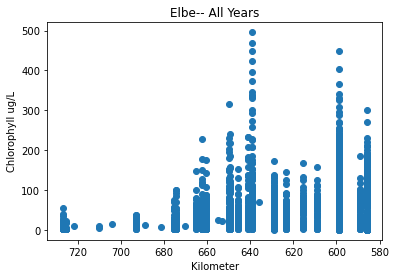

In [4]:
Stromkilometer = elbe_clorophyll_df_1['Stromkilometer'].astype(float)
Messwert = elbe_clorophyll_df_1['Messwert'].astype(float)

# plot of all cholorphyll values from all years on one plot
plt.scatter(Stromkilometer, Messwert)
plt.gca().invert_xaxis()
plt.title('Elbe-- All Years')
plt.xlabel('Kilometer')
plt.ylabel('Chlorophyll ug/L')

In [19]:
elbe_chlor_df_1_med = elbe_clorophyll_df_1[['Stromkilometer', 'Messwert']]
elbe_chlor_df_1_med.dropna()

elbe_chlor_df_1_med = elbe_chlor_df_1_med.groupby('Stromkilometer', as_index=False).median() 

stromkilometer_med = elbe_chlor_df_1_med['Stromkilometer']
messwert_med = elbe_chlor_df_1_med['Messwert']

#elbe_chlor_df_1_med.head()

Text(0, 0.5, 'Chlorophyll ug/L')

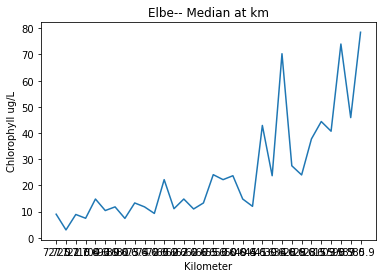

In [20]:
# Chlorophyll values from all years
plt.plot(stromkilometer_med, messwert_med)
plt.gca().invert_xaxis()
plt.title('Elbe-- Median at km')
plt.xlabel('Kilometer')
plt.ylabel('Chlorophyll ug/L')

## elbe depth

Text(0, 0.5, 'Depth')

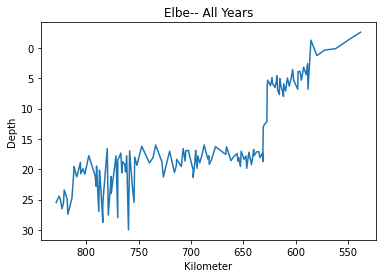

In [10]:
elbe_depth_df_1 = pd.read_csv(cwd + "/data/input/elbe/depth/df_1/Schelde Depth.csv")

elbe_depth_df_1['Stromkilometer'] = elbe_depth_df_1['Stromkilometer'].astype(float).round(1)
Stromkilometer_d = elbe_depth_df_1['Stromkilometer']
Depth = elbe_depth_df_1['Depth']
elbe_depth_df_1

# Depth plot
plt.plot(Stromkilometer_d, Depth)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.title('Elbe-- All Years')
plt.xlabel('Kilometer')
plt.ylabel('Depth')

## Elbe dephth and chlorophyll 

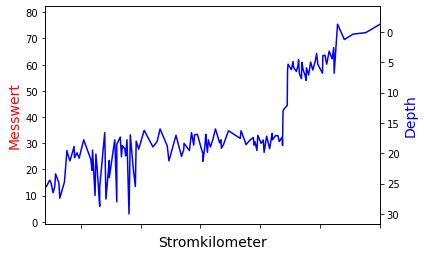

In [18]:
# create figure and axis objects with subplots()
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(stromkilometer_med, messwert_med, color="red") # this line won't show up when there is a limit on the x axis
ax2.plot(Stromkilometer_d, Depth, color="blue")

# x-axis
ax1.set_xlabel("Stromkilometer", fontsize = 14)
ax2.set_xlim(586,830) # red line is apparently outside these limits even though the data is in that range
plt.xticks(np.arange(550, 850, step=50))
plt.gca().invert_xaxis()

# y-axes
ax1.set_ylabel("Messwert", color="red", fontsize=14)
ax2.set_ylabel("Depth",color="blue",fontsize=14)
ax2.invert_yaxis()
